# Exploratory Data Analysis di E-Commerce

## Problem

- Perusahaan ingin meningkatkan penjualan

## Goals

- Mencari faktor dan strategi yang dapat mempengaruhi penjualan

### Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read Data

In [2]:
data = pd.read_csv("ecommerce.csv")

In [3]:
data.head(10)

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men
5,5,Athletic Shoes,"Nike Sport Sneaker Shoes for Men , 44 EU , White",319.0,234.99,30.0,NaN,FREE Shipping,men
6,6,Athletic Shoes,Adidas Duramo 9 Running Shoes For Men - Core B...,319.0,233.98,68.0,100.0,FREE Shipping,men
7,7,Athletic Shoes,"Nike Fitness Shoes For Men , 44.5 EU , Gray",389.0,280.98,71.0,NaN,FREE Shipping,men
8,8,Athletic Shoes,Nike Air Zoom Pegasus 36 Running Sneakers for ...,609.0,470.99,60.0,NaN,FREE Shipping,men
9,9,Athletic Shoes,"Nike Court Lite 2 Sneaker for Men , Size 42 EU...",339.0,236.99,33.0,NaN,FREE Shipping,men


##### Deskripsi Kolom

### Describe Data

In [4]:
data.shape

(609, 9)

- Ada 609 baris dan 9 kolom

In [5]:
data.columns

Index(['Unnamed: 0', 'category', 'product', 'Original_price', 'price',
       'perc_of_unit_sold', 'rating', 'shpping_rate', 'gender'],
      dtype='object')

In [6]:
dataDesc = []

for i in data.columns:
    dataDesc.append([
        i,
        data[i].dtypes,
        data[i].isnull().sum(),
        round((((data[i].isnull().sum()) / (len(data))) *100), 2),
        data[i].nunique(),
        data[i].drop_duplicates().sample(2).values
    ])

In [7]:
pd.DataFrame(dataDesc, columns = [
    "Data Feature",
    "Data types",
    "Null",
    "Null Percentage",
    "Unique",
    "Nunique"
])

,Data Feature,Data types,Null,Null Percentage,Unique,Nunique
0,Unnamed: 0,int64,0,0.00,180,"[43, 132]"
1,category,object,0,0.00,7,"[Casual & Dress Shoes, Perfumes & Fragrances]"
2,product,object,0,0.00,602,[August Steiner Men's Black Dial Metal Band Wa...
3,Original_price,float64,26,4.27,322,"[329.0, 319.0]"
4,price,float64,0,0.00,457,"[285.48, 346.98]"
5,perc_of_unit_sold,float64,87,14.29,92,"[82.0, 60.0]"
6,rating,float64,182,29.89,24,"[94.0, 90.0]"
7,shpping_rate,object,42,6.90,2,"[Eligible for FREE Shipping, FREE Shipping]"
8,gender,object,28,4.60,3,"[nan, women]"


- Data Types sudah sesuai semua
- Ada missing Value di 5 variable :
    - Original_price
    - perc_of_unit_sold
    - rating
    - shpping_rate
    - gender

### Handling Missing Value

#### 1. Numerik

#### Melihat Data Outliers

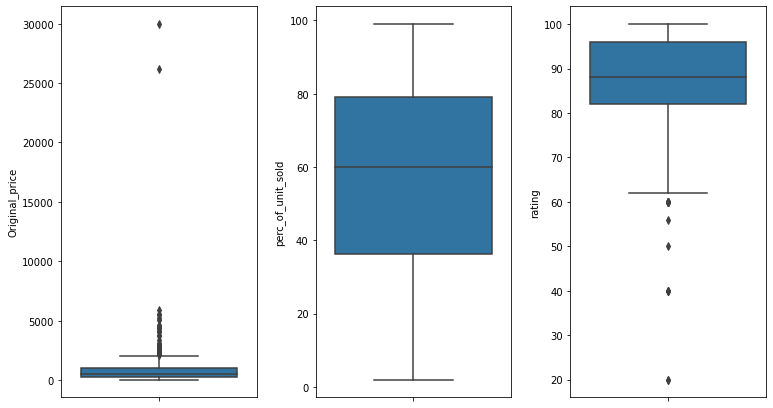

In [8]:
fig, axes = plt.subplots(1,3, figsize = (11,6.5))
fig.tight_layout(pad = 2.8)
sns.boxplot(y = data["Original_price"], ax = axes[0])
sns.boxplot(y = data["perc_of_unit_sold"], ax = axes[1])
sns.boxplot(y = data["rating"], ax = axes[2])
plt.show()

- Ada outliers di kolom Original_price dan rating

#### Cek outliers di kolom Original_price

In [9]:
data["Original_price"].describe()

count      583.000000
mean       864.498113
std       1803.365527
min         42.000000
25%        273.000000
50%        499.000000
75%        980.000000
max      29970.000000
Name: Original_price, dtype: float64

In [10]:
Q1 = 273
Q3 = 980

IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)

print("Original_price")
print("IQR =", IQR)
print("Upper fence =", upper_fence)
print("Lower fence = ", lower_fence)


Original_price
IQR = 707
Upper fence = 2040.5
Lower fence =  -787.5


In [11]:
data[(data["Original_price"] < lower_fence) | (data["Original_price"] > upper_fence)].head()

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
282,140,Eyewear,"Bottega Veneta Sunglasses For Unisex, Bv0013S-...",2094.0,1175.99,14.0,NaN,FREE Shipping,Unisex
431,2,Watches,JBW Mondrian Women's 16 Diamonds Rose Gold Dia...,2990.0,564.98,94.0,88.0,FREE Shipping,women
435,6,Watches,JBW 562 Men's 12 Diamonds Gold Dial Gold-Plate...,2749.0,1230.00,NaN,76.0,NaN,men
450,21,Watches,"Burberry Watch For Men,Stainless Steel Band, Q...",2865.0,1196.49,91.0,90.0,FREE Shipping,men
455,26,Watches,Akribos XXIV Men's Silver Dial Stainless Steel...,2610.0,209.49,81.0,100.0,FREE Shipping,men


#### Mengisi missing value di kolom Original_price dengan median, karena terdapat missing value

In [12]:
data["Original_price"].fillna(data["Original_price"].median(), inplace = True)

#### Cek data outliers di kolom rating

In [13]:
data["rating"].describe()

count    427.000000
mean      87.807963
std       11.422350
min       20.000000
25%       82.000000
50%       88.000000
75%       96.000000
max      100.000000
Name: rating, dtype: float64

In [14]:
Q1 = 82
Q3 = 96

IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q3 - (1.5 * IQR)

print("rating")
print("IQR =", IQR)
print("Upper fence =", upper_fence)
print("Lower fence =", lower_fence)

rating
IQR = 14
Upper fence = 117.0
Lower fence = 75.0


In [15]:
data[(data["rating"] > upper_fence) | (data["rating"] < lower_fence)].head()

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
104,9,Casual & Dress Shoes,Jack and Jones Shoes for Men - Black - 43 EU,209.0,100.49,39.0,74.0,Eligible for FREE Shipping,men
153,11,Eyewear,Diesel Wayfarer Unisex's Sunglasses - Dl0161 -...,755.0,238.49,57.0,66.0,FREE Shipping,Unisex
159,17,Eyewear,"Polaroid Sunglasses , for Women , Mixed , Avia...",201.0,129.49,22.0,60.0,Eligible for FREE Shipping,women
166,24,Eyewear,Ray-Ban Sunglasses for Unisex -0RB3552i,614.0,276.49,85.0,68.0,FREE Shipping,Unisex
205,63,Eyewear,Lacoste Men's Sunglasses Rectangular Petit Piq...,793.0,442.48,50.0,20.0,FREE Shipping,men


#### Mengisi missing value pada kolom rating dengan median, karena terdapat outliers

In [16]:
data["rating"].fillna(data["rating"].median(), inplace = True)

#### Handling missing value di kolom per_of_unit_sold, mengisinya dengan mean karena tidak ada outliers

In [17]:
data["perc_of_unit_sold"].fillna(data["perc_of_unit_sold"].mean(), inplace = True)

#### 2. Kategorik

#### Mengisi missing value pada kolom kategorik dengan modus

##### shpping_rate

In [18]:
data["shpping_rate"].describe()

count               567
unique                2
top       FREE Shipping
freq                356
Name: shpping_rate, dtype: object

In [19]:
data["shpping_rate"].fillna("FREE Shipping", inplace = True)

##### gender

In [20]:
data["gender"].describe()

count     581
unique      3
top       men
freq      338
Name: gender, dtype: object

In [21]:
data["gender"].fillna("men", inplace = True)

In [22]:
data.isna().sum()

Unnamed: 0           0
category             0
product              0
Original_price       0
price                0
perc_of_unit_sold    0
rating               0
shpping_rate         0
gender               0
dtype: int64

- Sudah tidak ada missinig value di dalam data

### Drop Kolom

- Menghapus kolom yang tidak digunakan dalam analisa data
- Menghapus kolom Unnamed: 0

In [23]:
data.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [24]:
data.head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,88.0,FREE Shipping,women
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,88.0,Eligible for FREE Shipping,men


### Cek Duplikasi Data

In [25]:
data[data.duplicated()]

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender


In [26]:
print(data.duplicated().value_counts())

False    609
dtype: int64


- Sudah tidak ada data duplikat

## Analisa Data

<AxesSubplot:>

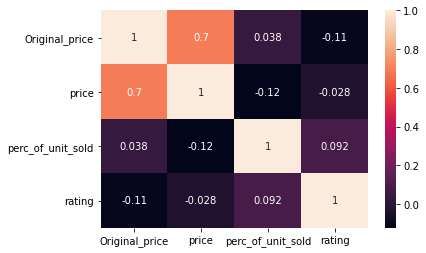

In [27]:
sns.heatmap(data.corr(), annot = True)

#### Membuat kolom diskon

In [28]:
data["diskon"] = round((data['Original_price'] - data['price']) / data['Original_price'] *100)

In [44]:
data.head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender,diskon
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men,29.0
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men,17.0
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,88.0,FREE Shipping,women,19.0
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men,34.0
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,88.0,Eligible for FREE Shipping,men,25.0


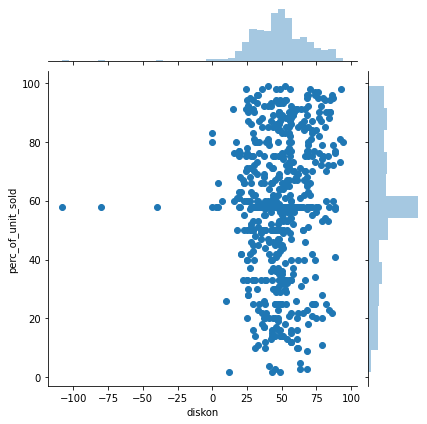

In [104]:
sns.jointplot(x = "diskon", y = "perc_of_unit_sold", data = data)
plt.show()

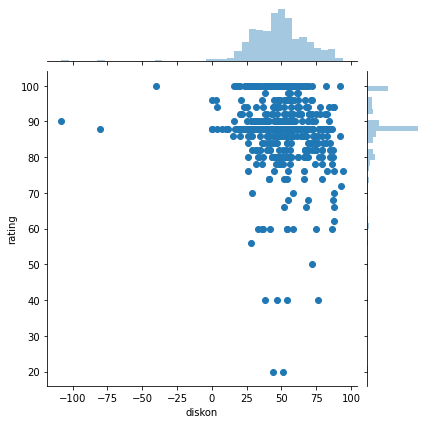

In [105]:
sns.jointplot(x = data["diskon"], y = data["rating"])
plt.show()

- Strategi memberikan potongan harga 50% bisa mempengaruhi persentase penjualan secara signifikan dan mendapatkan feedback berupa rating yang bagus dari customer

### Penjualan Produk Terjual per Category

In [87]:
pd.crosstab(index= data["category"], columns = "persentase terjual", values = data["perc_of_unit_sold"], aggfunc="count").sort_values("persentase terjual", ascending = False)

col_0,persentase terjual
category,
Watches,180
Eyewear,154
Athletic Shoes,95
Perfumes & Fragrances,63
Casual & Dress Shoes,47
Wallets,37
Sportswear,33


Text(0, 0.5, 'Produk Terjual')

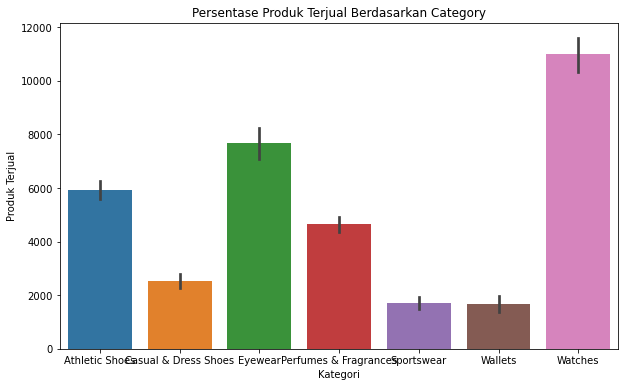

In [89]:
plt.figure(figsize= (10,6))
sns.barplot(data["category"], data["perc_of_unit_sold"], estimator = sum)
plt.title("Persentase Produk Terjual Berdasarkan Category")
plt.xlabel("Kategori")
plt.ylabel("Produk Terjual")

 - Watches menjadi kategori dengan persentase penjualan tertinggi

### Persentase Produk Terjual per Category Berdasarkan Gender

In [93]:
pd.crosstab(index=data["gender"], columns=data["category"], values=data["perc_of_unit_sold"], aggfunc="sum").round(2)

category,Athletic Shoes,Casual & Dress Shoes,Eyewear,Perfumes & Fragrances,Sportswear,Wallets,Watches
gender,,,,,,,
Unisex,66.00,NaN,3511.10,409.0,NaN,45.00,436.68
men,4349.10,2189.10,3256.43,1803.0,1151.71,1404.68,7366.28
women,1504.71,324.03,896.75,2437.0,568.68,203.68,3203.07


- Kategori Watches memiliki presentase tertinggi di semua jenis gender

In [99]:
pd.crosstab(index=data["category"], columns="product", values=data["perc_of_unit_sold"], aggfunc="count").sort_values("product", ascending = False)

col_0,product
category,
Watches,180
Eyewear,154
Athletic Shoes,95
Perfumes & Fragrances,63
Casual & Dress Shoes,47
Wallets,37
Sportswear,33


- Watches memiliki lebih banyak varian produk

### Pengiriman

In [86]:
pd.crosstab(data["shpping_rate"], columns = "Jumlah", values = ("perc_of_unit_sold"), aggfunc = "count")

col_0,Jumlah
shpping_rate,
Eligible for FREE Shipping,211
FREE Shipping,398


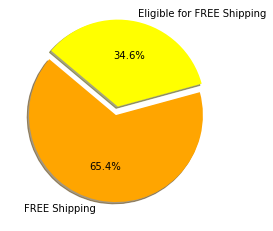

In [61]:
jenis = "FREE Shipping", "Eligible for FREE Shipping"
sizes = [398, 211]
explodes = (0, 0.1)

plt.pie(sizes, labels = jenis, explode = explodes,
       autopct = "%1.1f%%",
       shadow = True,
       startangle = 140,
       colors = ["orange", "yellow"])
plt.show()

- Jika dilihat dari data, penjualan dengan kategori "FREE Shipping" lebih tinggi dengan 65.4% dibandingkan dengan "Eligible for FREE Shipping" yang hanya 34.6%

In [92]:
data.groupby("category").sum().sort_values("perc_of_unit_sold",ascending = False)

,Original_price,price,perc_of_unit_sold,rating,diskon
category,,,,,
Watches,301205.1,97441.87,11006.022989,15728.0,9096.0
Eyewear,122891.3,57133.08,7664.275862,13270.0,8063.0
Athletic Shoes,37071.0,24320.47,5919.816092,8660.0,3143.0
Perfumes & Fragrances,17292.0,5783.93,4649.000000,5386.0,4020.0
Casual & Dress Shoes,21210.0,13130.82,2513.137931,4194.0,1787.0
Sportswear,6417.0,3286.47,1720.390805,2936.0,1516.0
Wallets,10890.0,5618.69,1653.356322,3336.0,1856.0


- **Watches juga menjadi kategori teratas dalam presentase penjualan, rating dan juga pemberi diskon tertinggi**

# INSIGHT

- **Strategi potong harga efektif dalam meningkatkan presentase penjualan dan mendapatkan feedback yang positif**
- **Variasi product mempengaruhi tingkat penjualan:**
    1. **Terbukti Penjualan dengan presentase teratas memiliki banyak variasi produk**
    2. **Watches: 180 dan Eyewear: 154 variasi**
- **Pengiriman dengan "FREE Shipping" lebih mendominasi jumlah transaksi**

# Rekomendasi

- **Melakukan promosi untuk category dengan penjualan terendah, yaitu sportswear dan wallet**
- **Menambah jumlah variasi product di category dengan penjualan terendah, karena tingkat variasi product mempengaruhi penjualan**